In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


## Reading the file and ajusting its indexing

In [2]:
df = pd.read_csv(r"C:\Users\sehri\Desktop\Machine Learning\Projects\Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.index = df.index + 1
pd.set_option("display.max_columns", None)
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking for null values

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Insight: There are no NaN values in the dataset

## Checking for Duplicated Values

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 1 to 7043
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Dropping customerID column as it is not needed for predictive modeling

In [6]:
df = df.drop(columns = ['customerID'])
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Getting Unique Values of features instead of numeric features


In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
numeric_feature_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in numeric_feature_list:
        print(col, df[col].unique())
        print('\n' + "-" * 50 + '\n')

gender ['Female' 'Male']

--------------------------------------------------

SeniorCitizen [0 1]

--------------------------------------------------

Partner ['Yes' 'No']

--------------------------------------------------

Dependents ['No' 'Yes']

--------------------------------------------------

PhoneService ['No' 'Yes']

--------------------------------------------------

MultipleLines ['No phone service' 'No' 'Yes']

--------------------------------------------------

InternetService ['DSL' 'Fiber optic' 'No']

--------------------------------------------------

OnlineSecurity ['No' 'Yes' 'No internet service']

--------------------------------------------------

OnlineBackup ['Yes' 'No' 'No internet service']

--------------------------------------------------

DeviceProtection ['No' 'Yes' 'No internet service']

--------------------------------------------------

TechSupport ['No' 'Yes' 'No internet service']

--------------------------------------------------

StreamingTV ['N

## Checking for Empty cells

In [9]:
# for col in df.columns:
#     blank = df[df[col] == ' ']
#     length = len(blank)
#     print(f'Empty cells in column {col} are {length}')
#     print('\n')

for col in df.columns:
    missing_values  = df[col].isna().sum()
    empty_strings = df[col].apply(lambda x : isinstance(x, str) and x.strip() == '').sum()
    total_empty_cells = missing_values + empty_strings
    print(f'The total number of empty cells in Column: {col} is {total_empty_cells}')
    print('\n')

The total number of empty cells in Column: gender is 0


The total number of empty cells in Column: SeniorCitizen is 0


The total number of empty cells in Column: Partner is 0


The total number of empty cells in Column: Dependents is 0


The total number of empty cells in Column: tenure is 0


The total number of empty cells in Column: PhoneService is 0


The total number of empty cells in Column: MultipleLines is 0


The total number of empty cells in Column: InternetService is 0


The total number of empty cells in Column: OnlineSecurity is 0


The total number of empty cells in Column: OnlineBackup is 0


The total number of empty cells in Column: DeviceProtection is 0


The total number of empty cells in Column: TechSupport is 0


The total number of empty cells in Column: StreamingTV is 0


The total number of empty cells in Column: StreamingMovies is 0


The total number of empty cells in Column: Contract is 0


The total number of empty cells in Column: PaperlessBilling is 0



### Insight: Only one column has empty cells and that column is TotalCharges


In [10]:
len(df[df["TotalCharges"]==" "])

11

## Addressing the empty cells in df['TotalCharges']

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0.0)

In [12]:
df[df['TotalCharges'] == 0.0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
489,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
754,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
937,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1083,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1341,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3332,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3827,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4381,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5219,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6671,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 1 to 7043
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Checking the class distribution

In [15]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Insight: There is a clear class imbalance in the dataset (based on df['Churn'])

# Numerical Distributions in the Dataset

## Function for making histoplots

In [16]:
def make_histoplot(col_name):
    plt.figure(figsize  = (8,4))
    sns.histplot(data = df[col_name], kde= True)
    plt.title(f'Distribution of {col_name}')

    col_mean = df[col_name].mean()
    col_median = df[col_name].median()

    plt.axvline(col_mean, color = 'blue', linestyle = '--', label = 'Mean')
    plt.axvline(col_median, color = 'red', linestyle = '-', label = 'Median')

    plt.legend()
    plt.show()

### Plotting Histoplots

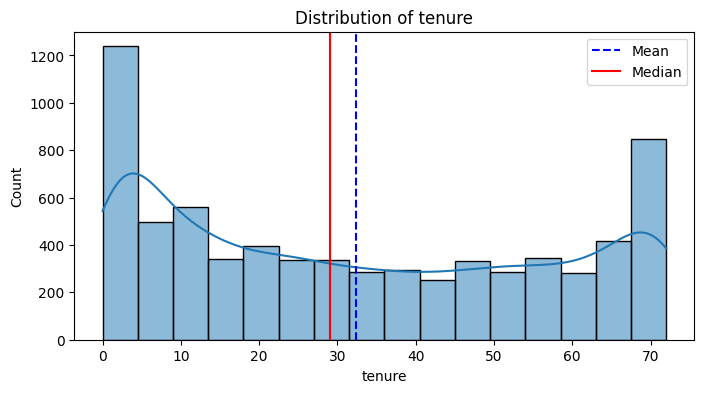

 
 column_name is tenure
Total Columns plotted: 1


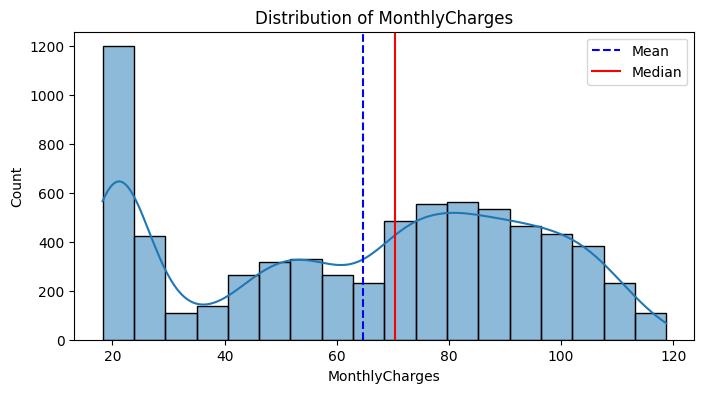

 
 column_name is MonthlyCharges
Total Columns plotted: 2


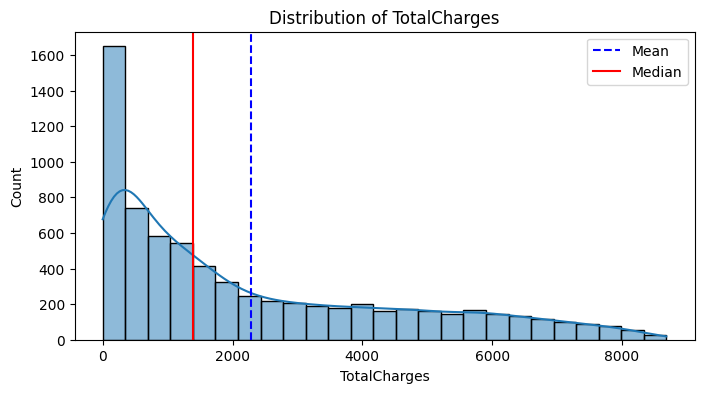

 
 column_name is TotalCharges
Total Columns plotted: 3


In [17]:
Total_distributions  = 0
num_cols  = ['tenure', 'MonthlyCharges', 'TotalCharges']


for col_name in num_cols:
    make_histoplot(col_name)
    print(f' \n column_name is {col_name}')
    Total_distributions += 1
    print(f'Total Columns plotted: {Total_distributions}')

# Plotting Box Plots

In [18]:

def make_boxplots(col_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col_name, data=df, palette='plasma')
    plt.title(f'{col_name} Distribution by Churn')
    plt.show()


C:\Users\sehri\AppData\Local\Temp\ipykernel_8244\3908833015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col_name, data=df, palette='plasma')


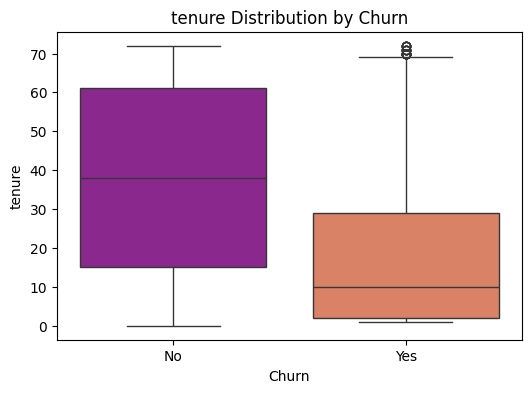

C:\Users\sehri\AppData\Local\Temp\ipykernel_8244\3908833015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col_name, data=df, palette='plasma')


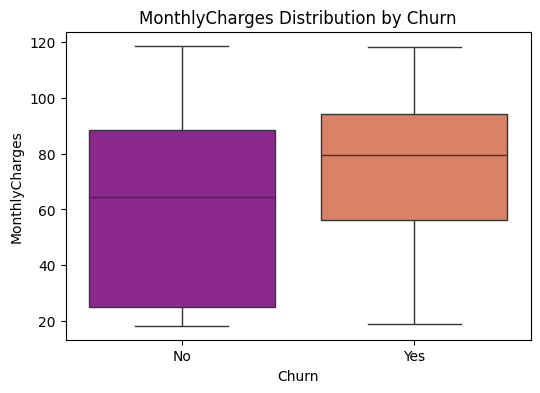

C:\Users\sehri\AppData\Local\Temp\ipykernel_8244\3908833015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col_name, data=df, palette='plasma')


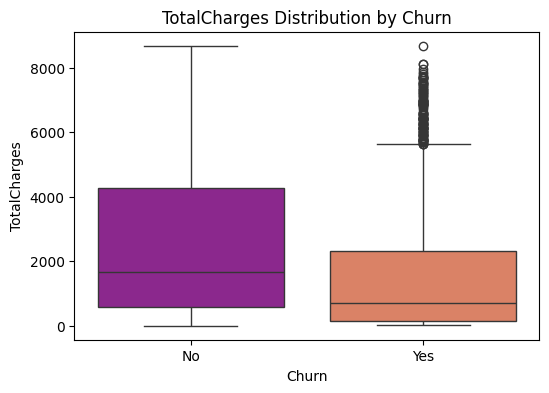

In [19]:
for col_name in num_cols:
    make_boxplots(col_name)
    

## Plotting Correlation Matrix

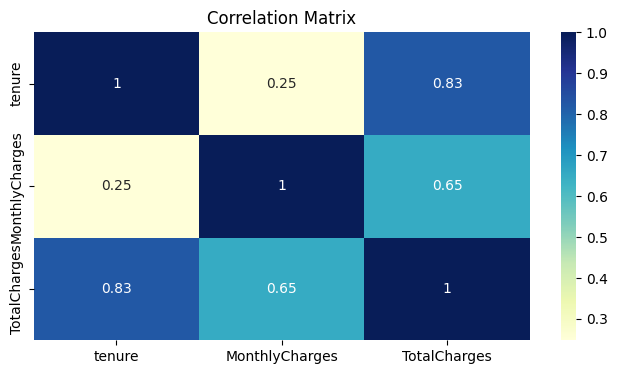

In [20]:
plt.figure(figsize  = (8,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),annot = True, cmap = 'YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [21]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
obj_cols = df.select_dtypes('object').columns.to_list()
obj_cols = ['SeniorCitizen'] + obj_cols
obj_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

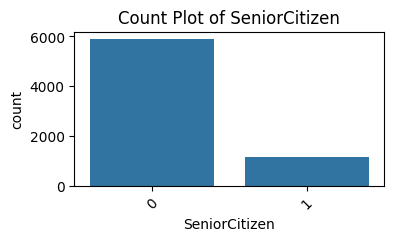

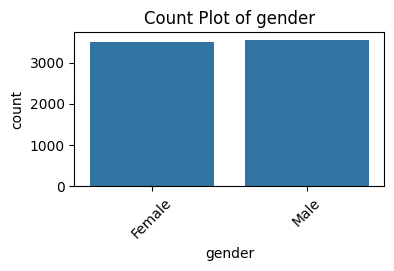

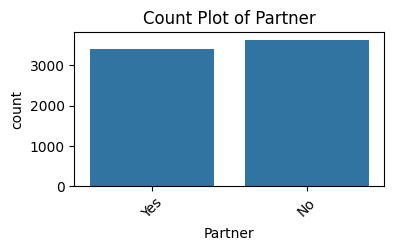

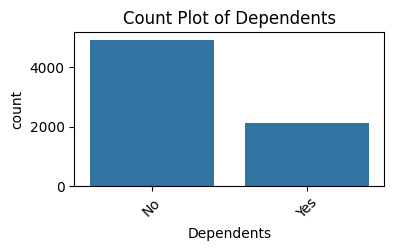

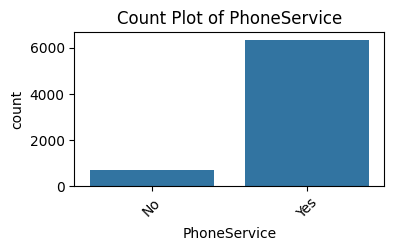

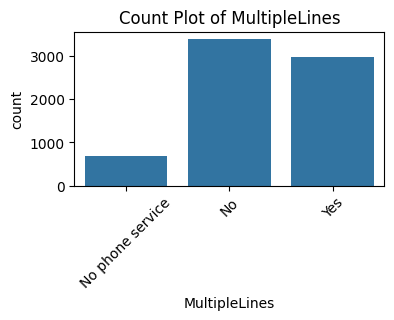

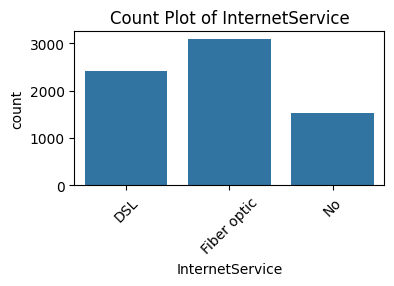

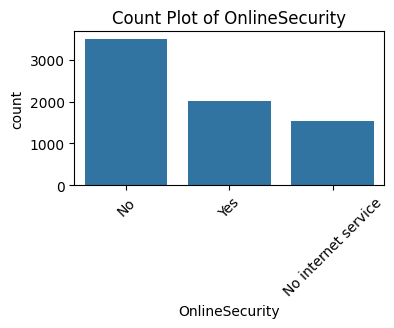

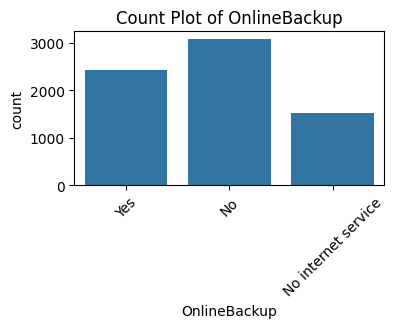

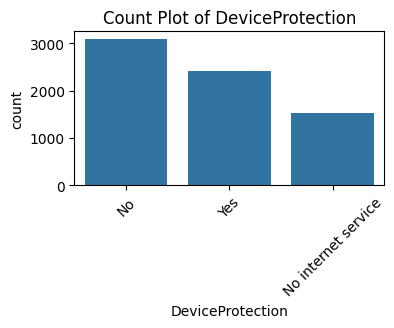

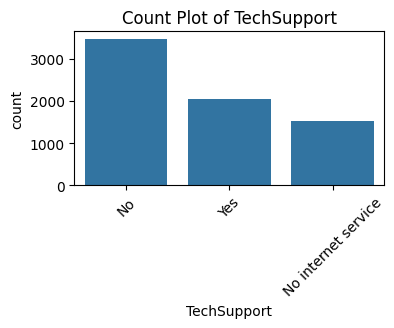

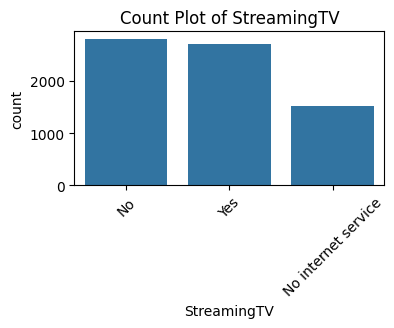

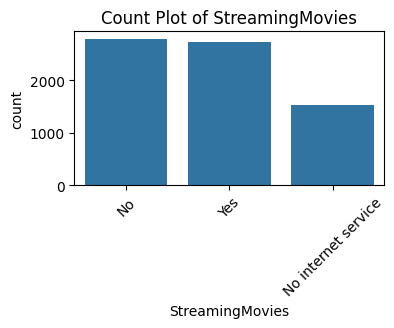

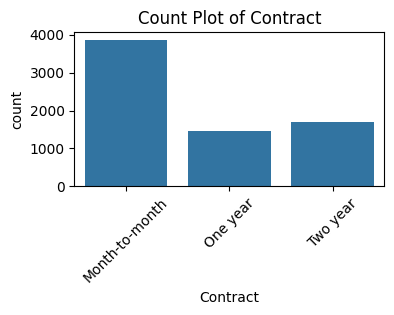

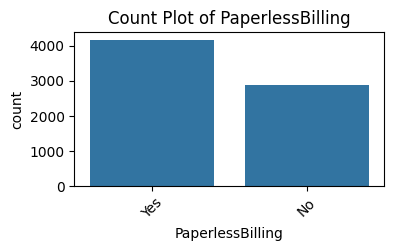

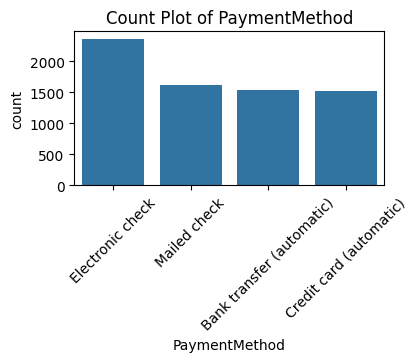

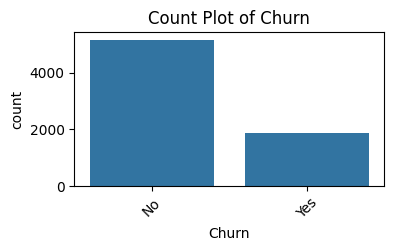

In [23]:
def make_countplot(col_name):
    plt.figure(figsize = (4,2))
    sns.countplot(x = df[col])
    plt.title(f'Count Plot of {col_name}')
    plt.xticks(rotation = 45)
    plt.show()

for col in obj_cols:
    make_countplot(col)


# Preparing for Modeling

In [24]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Encoding the Churn Output

In [25]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])


### Checking if encoding worked

In [26]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [27]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## Encoding all the object type features

In [28]:
# encoder = {}

# for col in obj_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     encoder[col] = le

# with open ('encoder.pkl', 'wb') as f:  # Saving the encoder as a pickle file
#     pickle.dump(encoder, f)

encoder = {}

# Apply Label Encoding before modifying df
for col in obj_cols:
    le = LabelEncoder()
    le.fit(df[col])            # Fit before transforming
    df[col] = le.transform(df[col])
    encoder[col] = le

encoder = {}

for col in obj_cols:
    le = LabelEncoder()
    le.fit(df[col].astype(str))  # Ensure data is string
    df[col] = le.transform(df[col].astype(str))
    encoder[col] = le


In [29]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
2,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
3,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [30]:
encoder

{'SeniorCitizen': LabelEncoder(),
 'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

## Feature Scaling

In [31]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(data = scaled_df, columns = df.columns)
scaled_df.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.992611,-0.601023
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.172165,-0.601023


## Feature Selection

In [32]:
x = scaled_df.drop(columns = ['Churn'])
y = df['Churn']

model = LogisticRegression(max_iter = 100)
selector = SequentialFeatureSelector(model, direction = 'forward')
selector.fit(x,y)



SequentialFeatureSelector(estimator=LogisticRegression())

In [33]:
selected_cols  = x.columns[selector.get_support()].tolist()
selected_cols

['gender',
 'SeniorCitizen',
 'tenure',
 'PhoneService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'MonthlyCharges',
 'TotalCharges']

# Making Predictive Models

In [34]:
x = df[[ 'gender',
         'SeniorCitizen',
         'tenure',
         'PhoneService',
         'OnlineSecurity',
         'TechSupport',
         'Contract',
         'MonthlyCharges',
         'TotalCharges']]

y = df['Churn']

train_x, test_x, train_y, test_y  = train_test_split(x,y,test_size = 0.4, random_state = 42)

smote= SMOTE(random_state = 42) # using SMOTE to balance the outcome, try df['Churn'].value_counts() to better understand

smote_train_x, smote_train_y = smote.fit_resample(train_x, train_y)



In [35]:
smote_train_y.value_counts()

Churn
0    3105
1    3105
Name: count, dtype: int64

# Using RandomForest Algorithm to predict the output here

### Using GridSearchCV

In [36]:
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],          # Number of trees
#     'max_depth': [None, 10, 20, 30, 40, 50],           # Max depth of trees
#     'min_samples_split': [2, 5, 10],                    # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],                      # Minimum samples required at a leaf node
#     'max_features': ['sqrt', 'log2', None],             # Number of features to consider at each split
#     'bootstrap': [True, False],                          # Whether bootstrap samples are used
#     'criterion': ['gini', 'entropy', 'log_loss'],       # Function to measure quality of split
#     'class_weight': [None, 'balanced']                   # Weights associated with classes (to handle imbalance)
# }


In [37]:
# grid_search = GridSearchCV(rf,param_grid, scoring = 'accuracy', 
#                                  n_jobs = -1, cv = 5, error_score = 'raise')

# grid_search.fit(smote_train_x, smote_train_y)

In [38]:
# best_params = grid_search.best_params_
# best_score  = grid_search.best_score_

# print(f'Best Parameters: {best_params}')
# print(f' Best Scores: {best_score}')


# best_model = grid_search.best_estimator_

# pred = best_model.predict(test_x)


### Using RanomizedSearchCV

In [39]:
rf = RandomForestClassifier(max_depth = 5,random_state = 42)

param_distributions = {
    'n_estimators': randint(100, 500),                  # Number of trees
    'max_depth': [None] + list(range(10, 50, 10)),      # Tree depth
    'min_samples_split': randint(2, 11),                # Min samples to split
    'min_samples_leaf': randint(1, 5),                  # Min samples at leaf
    'max_features': ['sqrt', 'log2', None],             # Features considered at each split
    'bootstrap': [True, False],                         # Bootstrap sampling
    'criterion': ['gini', 'entropy', 'log_loss'],       # Split criteria
    'class_weight': [None, 'balanced']                  # To handle imbalance
}

rand_search = RandomizedSearchCV(rf,param_distributions, n_iter = 5, scoring = 'accuracy', 
                                 n_jobs = -1, cv = 5, random_state = 42, error_score = 'raise')

In [40]:
rand_search.fit(smote_train_x, smote_train_y)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(max_depth=5,
                                                    random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019CAAFB39D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019CAAFB3890>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019CA96F4AD0>},
                   random_state=42, scoring='accuracy')

In [45]:
best_params = rand_search.best_params_
best_score  = rand_search.best_score_

print(f'Best Parameters: {best_params}')
print(f' Best Scores: {best_score* 100 : .2f}%')


best_model = rand_search.best_estimator_

pred = best_model.predict(test_x)

accuracy = accuracy_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)
f1 = f1_score(test_y, pred)

print(f'The accuracy score of the model is {accuracy * 100 : .2f}% ')





Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 221}
 Best Scores:  82.42%
The accuracy score of the model is  77.25% 
